Installing Libraries

In [34]:
!pip install plotly
!pip install chart_studio

Importing the Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

Reading the dataset

In [36]:
tesla = pd.read_csv("tesla.csv")
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


Converting to date-time format

In [37]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

<ipython-input-37-484d0f65faac>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



Giving insights on the dataset used

In [38]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} to {tesla.Date.max()}')
print(f'Total Days = {(tesla.Date.max() - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-01-07 00:00:00 to 2019-12-03 00:00:00
Total Days = 3617 days


Getting the statistics in summary

In [39]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


Plotting Box Graph

<Axes: >

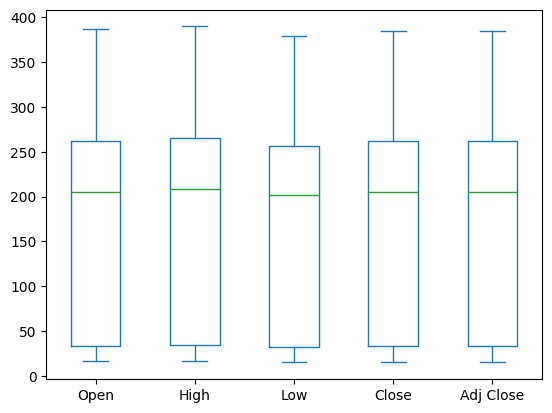

In [40]:
tesla[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind = 'box')

Layout for the plot

In [41]:
layout = go.Layout(
    title = "Stock Prices of Tesla",
    xaxis = dict(
        title = "Date",
        titlefont = dict(
            family = "Courier New, monospace",
            size = 18,
            color = "#7f7f7f"
        )
    ),
    yaxis = dict(
        title = "Price",
        titlefont = dict(
            family = "Courier New, monospace",
            size = 18,
            color = "#7f7f7f",
        )
    )
)
tesla_data = [{'x': tesla['Date'], 'y': tesla['Close']}]
plot = go.Figure(data = tesla_data, layout = layout)
iplot(plot)

Building the Regression Model

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

Splitting the data into training set and test set

In [44]:
x = np.array(tesla.index).reshape(-1, 1)
y = tesla['Close']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

Feature Scaling

In [46]:
scaler = StandardScaler().fit(x_train)

Creating a Linear Model

In [47]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

Plotting Actual vs Trained values

In [48]:
trace0 = go.Scatter(
    x = x_train.T[0],
    y = y_train,
    mode = "markers",
    name = "Actual",
)
trace1 = go.Scatter(
    x = x_train.T[0],
    y = lm.predict(x_train).T,
    mode = "lines",
    name = "Predicted",
)
telsa_data = [trace0, trace1]
layout.xaxis.title.text = "Day"
plot2 = go.Figure(data = tesla_data, layout = layout)
iplot(plot2)

Score for Model Evaluation

In [49]:
scores = f'''
{"Metric".ljust(10)}{"Train".center(20)}{"Test".center(20)}
{"r2_score".ljust(10)}{r2_score(y_train, lm.predict(x_train))}\t{r2_score(y_test, lm.predict(x_test))}
{"MSE".ljust(10)}{mse(y_train, lm.predict(x_train))}\t{mse(y_test, lm.predict(x_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8658871776828707	0.8610649253244574
MSE       1821.3833862936174	1780.987539418845

